In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
employees=pd.read_csv('final-employee-ds.csv')
employees.head()

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4


## Q1) Load the TrainingHours column into a NumPy array.

*   Convert to float datatype
*   Find mean & standard deviation

**Solution:**

In [3]:
employees.head()
training_hours=employees['TrainingHours'].values

training_hours=training_hours.astype(float)
mean=training_hours.mean()
std=training_hours.std()
print("Mean:",mean)
print("Standard Deviation:",std)
#

Mean: 24.19
Standard Deviation: 13.842467265628624


## Handle missing values (if any):


*   Fill missing Salary with department-wise median
*   Calculate total Salary sum for employees with ExperienceYears > 12 and ProjectCount > 5

Final output: One numeric value

**Solution:**

In [39]:
# Fill missing Salary with department-wise median Filling
group_by_department=employees.groupby('Department')['Salary'].transform('median')
print(employees['Salary'].hasnans)
employees['Salary']=employees['Salary'].fillna(group_by_department)
employees['Salary'].hasnans

#  Calculating total Salary sum for employees with ExperienceYears > 12 and ProjectCount > 5

filtered_df=employees[(employees['ExperienceYears']>12) & (employees['ProjectCount']>5)]
total_salary=filtered_df['Salary'].sum()
print(total_salary)





False
1985775.5


Filter employees who:
*   Department = "IT" or "Finance"
*   Age between 30–45
*   PerformanceScore > 88
*   Sort by Salary descending

**Final output:** Table with Name, Department, Salary, PerformanceScore

**Solutions:** 

In [40]:
employees.head()

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4


In [ ]:
# Filtering by Department ("IT" | "Finance")
department_filtered_df=employees[(employees['Department'] == "IT" ) | (employees['Department'] == "Finance" )]

# Filtering by Age (30<= Age <=45)
age_filtered_df= department_filtered_df[(department_filtered_df['Age'] >= 30) & (department_filtered_df['Age'] <= 45 )]

# Filtering by PerformanceScore (PerformanceScore>88)
performance_score_filtered_df=age_filtered_df[(age_filtered_df['PerformanceScore'] >88)]

# Sorting in descending order by Salary
sorted_data=performance_score_filtered_df.sort_values(by='Salary',ascending=False) 

# Showing thedata
sorted_data[['Name','Department','Salary','PerformanceScore']].style.hide(axis='index')




       Name Department   Salary  PerformanceScore
Employee_95         IT 140386.0                94
Employee_89    Finance 126027.0                92
 Employee_5    Finance  85543.0                97
Employee_33         IT  83919.0                98
Employee_56    Finance  49540.0                94


## Add new column SalaryPerHour = Salary ÷ (WorkHoursPerWeek × 4)

* Filter top 5 employees by SalaryPerHour
 
**Final output:** Table(5 Rows) with Name, SalaryPerHour

## **Solution: **

In [ ]:
employees["SalaryPerHour"]=employees["Salary"]/(employees["WorkHoursPerWeek"] * 4)

filtered_top_five_employees=employees.sort_values(by='SalaryPerHour',ascending=False).head(5)
filtered_top_five_employees[["Name","SalaryPerHour"]].style.hide(axis='index')


Name,SalaryPerHour
Employee_47,981.278571
Employee_28,971.292857
Employee_32,967.392857
Employee_80,945.335526
Employee_81,937.858974


 ## Q5) Create a **stacked bar chart** showing the count of employees in each **Department**, separated by **Gender**.
**Dataset Columns Used:**


*   Department → Categorical variable (IT, Finance, HR, Marketing, Management)
*   Gender → Categorical variable (Male, Female)

**Expected Output:**
* A stacked bar chart where:
   * x-axis → Department
   * y-axis → Number of employees
   * Each bar split into Male and Female segments
   * Colors differentiate gender


## **Solutions:** 

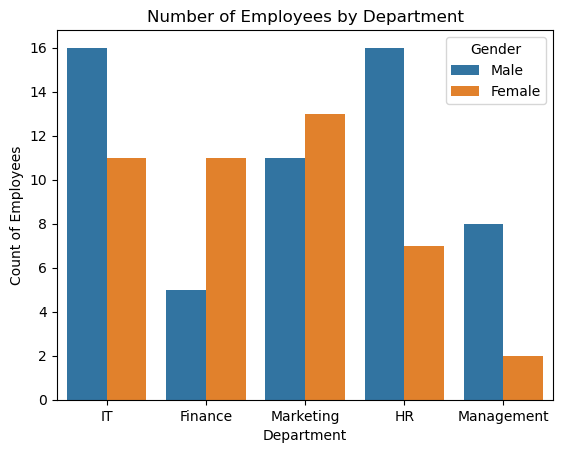

In [4]:
sns.countplot(data=employees,x='Department',hue='Gender')
plt.xlabel("Department")
plt.ylabel("Count of Employees")
plt.title("Number of Employees by Department")
plt.show()